4 — Premières explorations simples du dataframe `analytic`
==========================================================

Nous repartons ici d'un des deux dataframes créés (et exportés en CSV) dans le notebook 3, et nous en effectuons quelques premières visualisations et explorations simples. On se concentre surtout sur la vérification des données, et la vérification de l'équilibre du plan expérimental.

In [1]:
## Exécuter à nouveau le notebook 1 :
library(groundhog)
groundhog.library("here", "2021-10-15")
capture.output(source(here("jour2", "01_workflow_jupyter.r")))

Loaded 'groundhog' (version:1.5.0) using R-4.1.1

Path to folder where downloaded packages are saved: 'C:\Users\f.desantos/R_groundhog/groundhog_library/'.
To change its location: 'set.groundhog.folder(<path>)'
     >>> If you encounter errors using groundhog: https://groundhogR.com/troubleshooting

Attaching here_1.0.1

here() starts at C:/Users/f.desantos/Documents/ANF_R_Python/anf-cnrs-ds-r

Attaching beeswarm_0.4.0

Attaching data.table_1.14.2

Attaching fs_1.5.0

groundhog says: the package you requested ('here_1.0.1') is already attached.

Attaching nbconvertR_1.3.2

groundhog says: the package you requested ('repr_1.1.3') was loaded, now it is also attached

Attaching RJSONIO_1.3-1.6

Attaching dplyr_1.0.7

Attaching nlme_3.1-153

Attaching ggplot2_3.3.5

Attaching plotly_4.10.0

Attaching textshape_1.7.3

groundhog says: the package you requested ('tidyr_1.1.4') was loaded, now it is also attached



character(0)

## 4.1. Charger le fichier CSV

**Exercice 4.1** (Pour s'échauffer...)

Charger à nouveau le fichier CSV `data/data_analytic.csv` construit et exporté lors du notebook 3.

In [2]:
## Chargement des données :
analytic <- read.csv(
    here("data", "data_analytic.csv"),
    row.names = 1,
    stringsAsFactors = TRUE
)
head(analytic)

name   force_level ctrl phase cutoff feedback
sujet1_pos_ent_0.2_pc_0 sujet1 22          pos  ent   0.2    pc      
sujet1_pos_ent_0.2_pc_2 sujet1 22          pos  ent   0.2    pc      
sujet1_pos_ent_0.2_pe_1 sujet1 22          pos  ent   0.2    pe      
sujet1_pos_ent_0.2_pe_3 sujet1 22          pos  ent   0.2    pe      
sujet1_pos_ent_0.3_pc_4 sujet1 22          pos  ent   0.3    pc      
sujet1_pos_ent_0.3_pc_6 sujet1 22          pos  ent   0.3    pc      
                        percent_err nb_points num_essai
sujet1_pos_ent_0.2_pc_0    6.836902 3001      0        
sujet1_pos_ent_0.2_pc_2   23.149394 3001      2        
sujet1_pos_ent_0.2_pe_1 1137.405575 3000      1        
sujet1_pos_ent_0.2_pe_3    8.207029 2996      3        
sujet1_pos_ent_0.3_pc_4    4.735784 3001      4        
sujet1_pos_ent_0.3_pc_6    4.467316 3001      6

## 4.2. Quelques dénombrements

**Exercice 4.2** (Un peu de comptage)
1. Déterminer le nombre de sujets prenant part à cette analyse.
2. Combien de sujets ont suivi la condition "contrôle position" ?
3. Combien de sujets ont suivi la condition "contrôle vitesse" ?
4. Conclusion quant au plan expérimental ?

In [5]:
## Nombre de sujets ayant pris part à l'analyse :
nlevels(analytic$name)

[1] 22

In [8]:
## Nombre de sujets par condition "contrôle position" / "contrôle vitesse" :
tapply(analytic$name,
       INDEX = analytic$ctrl,
       FUN = function(x) nlevels(factor(x)))

pos vit 
 11  11

Le plan expérimental est donc équilibré, avec 11 sujets par condition.

Durant l'expérience, les sujets ont dû forcer et travailler à 22% de leur force maximale. La force des sujets est-elle bien répartie sur les deux modes de contrôle (vitesse / position) ?

**Exercice 4.3** (Un premier graphique)
1. En repartant du dataframe `analytic`, créer un dataframe `reduced` comportant uniquement les colonnes `name`, `ctrl` et `force_level`.
2. Supprimer toutes les lignes doublons de ce dataframe (indice : voir les fonctions `unique()`, ou éventuellement `dplyr::distinct()`).
3. Conserver uniquement les cas complets dans ce dataframe (i.e., supprimez toutes les lignes avec au moins un `NA`).
4. Visualiser un extrait de ce dataframe.
5. Créer un *beeswarm* de la variable `force_level` en fonction de `ctrl`. Que dire des dispersions observées ?

In [11]:
## Créer un dataframe réduit :
reduced <- analytic |>
    select(name, ctrl, force_level) |>
    unique() |>
    na.omit()
print(reduced)

                            name ctrl force_level
sujet1_pos_ent_0.2_pc_0   sujet1  pos   22.000000
sujet10_vit_ent_0.2_pc_1 sujet10  vit   19.143827
sujet11_vit_ent_0.2_pc_0 sujet11  vit   29.445708
sujet12_vit_ent_0.2_pc_1 sujet12  vit   18.572991
sujet13_pos_ent_0.2_pc_0 sujet13  pos   22.133104
sujet14_vit_ent_0.2_pc_0 sujet14  vit   14.075519
sujet15_vit_ent_0.2_pc_1 sujet15  vit    9.962888
sujet16_pos_ent_0.2_pc_1 sujet16  pos   17.850640
sujet17_vit_ent_0.2_pc_0 sujet17  vit   29.014568
sujet18_vit_ent_0.2_pc_1 sujet18  vit   28.449382
sujet19_vit_ent_0.2_pc_0 sujet19  vit   20.387022
sujet2_pos_ent_0.2_pc_1   sujet2  pos   21.271327
sujet20_pos_ent_0.2_pc_0 sujet20  pos   40.185179
sujet21_pos_ent_0.2_pc_1 sujet21  pos   14.985993
sujet22_pos_ent_0.2_pc_1 sujet22  pos   22.816887
sujet3_pos_ent_0.2_pc_0   sujet3  pos   17.821011
sujet4_pos_ent_0.2_pc_1   sujet4  pos   24.201755
sujet5_pos_ent_0.2_pc_0   sujet5  pos   19.083816
sujet6_pos_ent_0.2_pc_1   sujet6  pos   20.876794


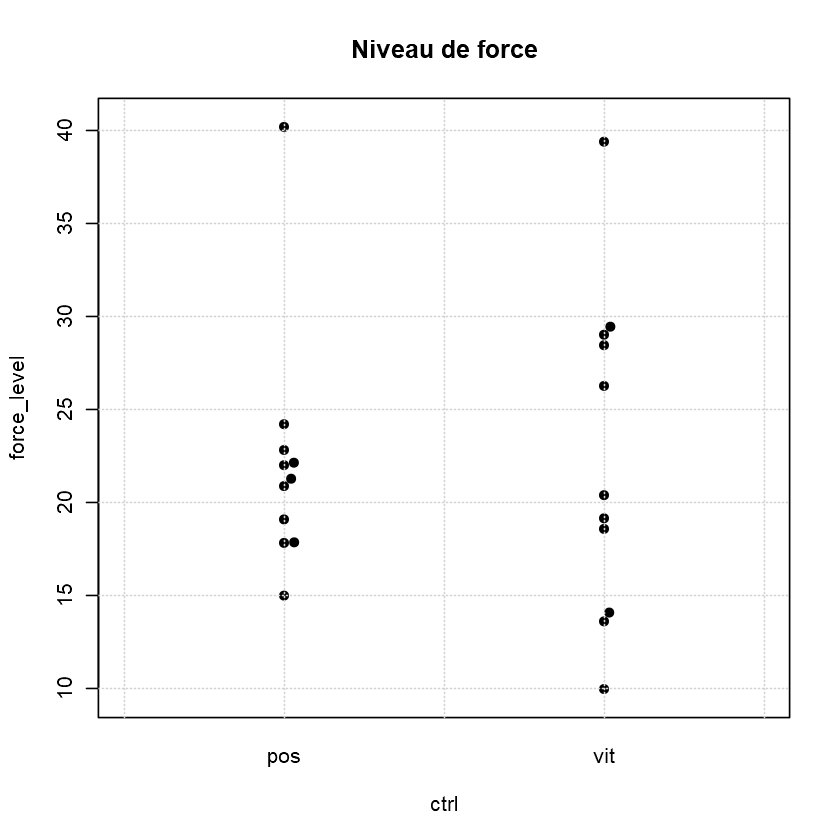

In [16]:
## Beeswarm du 22%MVF :
beeswarm(force_level ~ ctrl, data = reduced, pch = 16,
        main = "Niveau de force")
grid()

## 4.3. Le type des colonnes

Observons à présent un résumé de notre dataframe :

In [17]:
summary(analytic)

      name      force_level      ctrl      phase         cutoff     feedback
 sujet1 : 20   Min.   : 9.963   pos:220   ent :264   Min.   :0.20   pc:220  
 sujet10: 20   1st Qu.:17.851   vit:220   test:176   1st Qu.:0.30   pe:220  
 sujet11: 20   Median :21.074                        Median :0.40           
 sujet12: 20   Mean   :22.343                        Mean   :0.38           
 sujet13: 20   3rd Qu.:26.262                        3rd Qu.:0.40           
 sujet14: 20   Max.   :40.185                        Max.   :0.60           
 (Other):320                                                                
  percent_err         nb_points      num_essai    
 Min.   :   1.686   Min.   :2781   Min.   : 0.00  
 1st Qu.:   9.326   1st Qu.:3000   1st Qu.: 4.75  
 Median :  22.754   Median :3001   Median : 9.50  
 Mean   :  58.990   Mean   :4707   Mean   : 9.50  
 3rd Qu.:  51.716   3rd Qu.:7176   3rd Qu.:14.25  
 Max.   :3065.870   Max.   :7501   Max.   :19.00  
                           

La colonne `cutoff` est ici reconnue comme donnée numérique (ce qui est logique !), mais ce serait plus arrangeant pour nous qu'elle soit considérée comme un facteur pour la suite des analyses (c'est une *condition* expérimentale fixée, pas véritablement une valeur mesurée).

**Exercice 4.4.** (Conversion de type)

Convertir la variable `cutoff` du dataframe `analytic` en facteur. Afficher un résumé du dataframe `analytic` après cette opération.

In [18]:
## Conversion en facteur pour la variable `cutoff` :
analytic$cutoff <- factor(analytic$cutoff)
summary(analytic)

      name      force_level      ctrl      phase     cutoff    feedback
 sujet1 : 20   Min.   : 9.963   pos:220   ent :264   0.2: 88   pc:220  
 sujet10: 20   1st Qu.:17.851   vit:220   test:176   0.3: 88   pe:220  
 sujet11: 20   Median :21.074                        0.4:176           
 sujet12: 20   Mean   :22.343                        0.6: 88           
 sujet13: 20   3rd Qu.:26.262                                          
 sujet14: 20   Max.   :40.185                                          
 (Other):320                                                           
  percent_err         nb_points      num_essai    
 Min.   :   1.686   Min.   :2781   Min.   : 0.00  
 1st Qu.:   9.326   1st Qu.:3000   1st Qu.: 4.75  
 Median :  22.754   Median :3001   Median : 9.50  
 Mean   :  58.990   Mean   :4707   Mean   : 9.50  
 3rd Qu.:  51.716   3rd Qu.:7176   3rd Qu.:14.25  
 Max.   :3065.870   Max.   :7501   Max.   :19.00  
                                                  

## 4.4. Homogénéité des conditions expérimentales

Nous pouvons valider l'homogénéité des conditions à travers tous les sujets avant de commencer à les comparer.

**Exercice 4.5** (Diverses petites vérifications des données)

1. Les sujets ont-ils tous le même nombre d'essais ? (Concrètement : affichez un décompte des modalités du facteur `name` dans le dataframe `analytic`. Que pouvez-vous en déduire ?)
2. Ont-ils tous le même nombre d'essais de type `test` et `ent` ? (Concrètement : construisez la table de contingence des facteurs `name` et `phase`. Que pouvez-vous en déduire ?)
3. Ont-ils tous le même nombre d'essais aux différentes valeurs de fréquence de coupure ? (Concrètement : construisez la table de contingence des facteurs `name` et `cutoff`. Que pouvez-vous en déduire ?)
4. Ont-ils tous le même nombre d'essais en poursuite d'erreur `pe` et en poursuite de cible `pc` ? (Idem !)

In [20]:
## Nombre global d'essais par sujet :
table(analytic$name)
summary(analytic$name) # une alternative


 sujet1 sujet10 sujet11 sujet12 sujet13 sujet14 sujet15 sujet16 sujet17 sujet18 
     20      20      20      20      20      20      20      20      20      20 
sujet19  sujet2 sujet20 sujet21 sujet22  sujet3  sujet4  sujet5  sujet6  sujet7 
     20      20      20      20      20      20      20      20      20      20 
 sujet8  sujet9 
     20      20 

sujet1 sujet10 sujet11 sujet12 sujet13 sujet14 sujet15 sujet16 sujet17 sujet18 
     20      20      20      20      20      20      20      20      20      20 
sujet19  sujet2 sujet20 sujet21 sujet22  sujet3  sujet4  sujet5  sujet6  sujet7 
     20      20      20      20      20      20      20      20      20      20 
 sujet8  sujet9 
     20      20

In [21]:
## Nombre d'essais de chaque type (ent/test) par sujet :
table(analytic$name, analytic$phase)

         
          ent test
  sujet1   12    8
  sujet10  12    8
  sujet11  12    8
  sujet12  12    8
  sujet13  12    8
  sujet14  12    8
  sujet15  12    8
  sujet16  12    8
  sujet17  12    8
  sujet18  12    8
  sujet19  12    8
  sujet2   12    8
  sujet20  12    8
  sujet21  12    8
  sujet22  12    8
  sujet3   12    8
  sujet4   12    8
  sujet5   12    8
  sujet6   12    8
  sujet7   12    8
  sujet8   12    8
  sujet9   12    8

In [22]:
## Nombre d'essais par valeur de coupure :
with(analytic, table(name, cutoff))

         cutoff
name      0.2 0.3 0.4 0.6
  sujet1    4   4   8   4
  sujet10   4   4   8   4
  sujet11   4   4   8   4
  sujet12   4   4   8   4
  sujet13   4   4   8   4
  sujet14   4   4   8   4
  sujet15   4   4   8   4
  sujet16   4   4   8   4
  sujet17   4   4   8   4
  sujet18   4   4   8   4
  sujet19   4   4   8   4
  sujet2    4   4   8   4
  sujet20   4   4   8   4
  sujet21   4   4   8   4
  sujet22   4   4   8   4
  sujet3    4   4   8   4
  sujet4    4   4   8   4
  sujet5    4   4   8   4
  sujet6    4   4   8   4
  sujet7    4   4   8   4
  sujet8    4   4   8   4
  sujet9    4   4   8   4

In [23]:
## Nombre d'essais de type pe/pc :
with(analytic, table(name, feedback))

         feedback
name      pc pe
  sujet1  10 10
  sujet10 10 10
  sujet11 10 10
  sujet12 10 10
  sujet13 10 10
  sujet14 10 10
  sujet15 10 10
  sujet16 10 10
  sujet17 10 10
  sujet18 10 10
  sujet19 10 10
  sujet2  10 10
  sujet20 10 10
  sujet21 10 10
  sujet22 10 10
  sujet3  10 10
  sujet4  10 10
  sujet5  10 10
  sujet6  10 10
  sujet7  10 10
  sujet8  10 10
  sujet9  10 10

Conclusion : nous avons bien vérifié le bon équilibre de toutes les conditions expérimentales. C'est un bon début !

**Exercice 4.5** (Où est Popeye ?)

1. Afficher un résumé numérique de la variable `force_level`.
2. Inspecter sa distribution par un ou plusieurs moyens de votre choix (boxplots, histogrammes, estimation de densité, ...).
3. Identifier l'individu (ou les individus) présentant des valeurs remarquablement hautes pour cette variable.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.963  18.031  21.074  22.343  25.747  40.185 

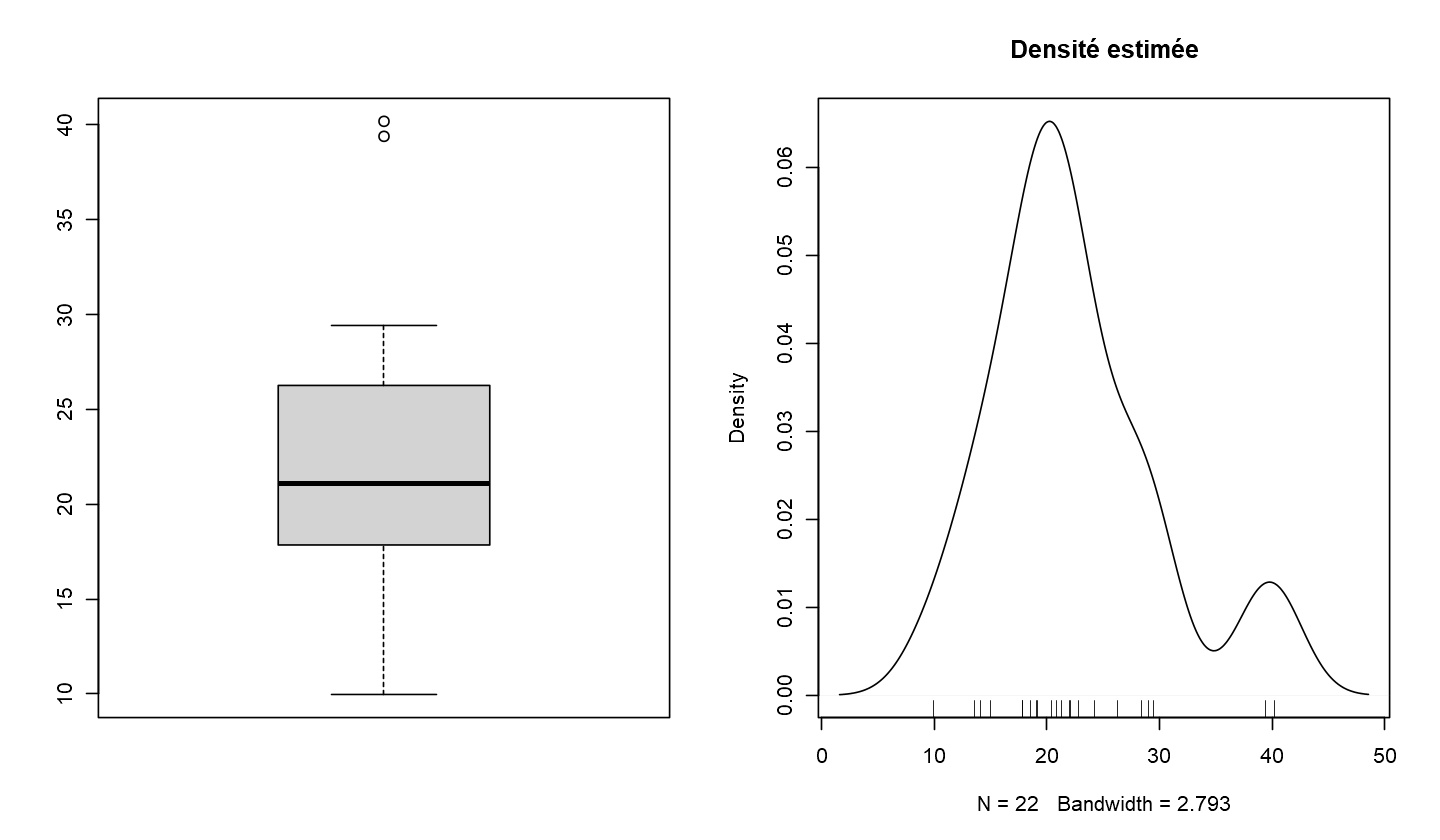

In [30]:
## Un retour sur la variable `force_level` :
summary(reduced$force_level)
par(mfrow = c(1, 2))
options(repr.plot.width = 12) # spécifique Jupyter : largeur du graphique
boxplot(reduced$force_level)
plot(density(reduced$force_level), main = "Densité estimée")
rug(reduced$force_level)

In [32]:
## Où se situent les valeurs les plus élevées ?
reduced |>
    arrange(force_level) |>
    tail()

name    ctrl force_level
sujet9_vit_ent_0.2_pc_0  sujet9  vit  26.26246   
sujet18_vit_ent_0.2_pc_1 sujet18 vit  28.44938   
sujet17_vit_ent_0.2_pc_0 sujet17 vit  29.01457   
sujet11_vit_ent_0.2_pc_0 sujet11 vit  29.44571   
sujet8_vit_ent_0.2_pc_1  sujet8  vit  39.39342   
sujet20_pos_ent_0.2_pc_0 sujet20 pos  40.18518

Une dernière vérification pour terminer... 

**Exercice 4.6** (`aggregate()` est notre amie)

A-t-on bien le même nombre d'individus pour chaque croisement des 4 conditions expérimentales `cutoff`, `phase`, `feedback` et `ctrl` ? I.e., pouvez-vous déterminer le décompte des cas pour chaque croisement de ces 4 conditions ? (Indice : en R-base, la fonction `aggregate()` est un moyen d'y parvenir : consulter son aide si besoin. Si vous êtes plutôt familier(e) avec le tidyverse, sentez-vous libre d'utiliser d'autres instructions pour y parvenir.)

In [33]:
## Une ultime vérification sur l'équilibrage du plan :
aggregate(name ~ cutoff + phase + feedback + ctrl,
          data = analytic, FUN = length)

cutoff phase feedback ctrl name
1  0.2    ent   pc       pos  22  
2  0.3    ent   pc       pos  22  
3  0.4    ent   pc       pos  22  
4  0.4    test  pc       pos  22  
5  0.6    test  pc       pos  22  
6  0.2    ent   pe       pos  22  
7  0.3    ent   pe       pos  22  
8  0.4    ent   pe       pos  22  
9  0.4    test  pe       pos  22  
10 0.6    test  pe       pos  22  
11 0.2    ent   pc       vit  22  
12 0.3    ent   pc       vit  22  
13 0.4    ent   pc       vit  22  
14 0.4    test  pc       vit  22  
15 0.6    test  pc       vit  22  
16 0.2    ent   pe       vit  22  
17 0.3    ent   pe       vit  22  
18 0.4    ent   pe       vit  22  
19 0.4    test  pe       vit  22  
20 0.6    test  pe       vit  22

## 4.5. Bilan

Dans ce notebook, nous nous sommes notamment entraînés à :
- vérifier automatiquement, grâce à un pipeline de tests en lignes de commandes, que les données sont conformes au plan attendu et exemptes d'erreurs grossières ;
- manipuler, filtrer, remettre en forme des dataframes.